## Análisis de Bayes Archivo titanic

## Importar librerías

In [ ]:
import numpy as np
import pandas as pd # son los que gneeran columanas para mostrar los datos como si fueran excel

import matplotlib.pyplot as plt    #generar graficos
import seaborn as sb # generar gráficos
%matplotlib inline 
from sklearn.model_selection import train_test_split  #separar los datos (train y test)
from sklearn.naive_bayes import GaussianNB    #clase que permite el análisis gaussiano
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/gdrive')  #a través de drive

Mounted at /content/gdrive


## Cargar datos desde el drive

In [ ]:
# cargando los datos
data_ti = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/dataset_titanic.csv', encoding='utf-8')

## Limpiando los datos

In [ ]:
# identificando la presencia de valores (nulos edad y cabin tienen muchos)
data_ti.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Agrupando columnas por tipo de datos para facilitar el llenado de datos cuando son nulos
tipos = data_ti.columns.to_series().groupby(data_ti.dtypes).groups

# Armando lista de columnas categóricas
ctext = tipos[np.dtype('object')]
len(ctext)  # cantidad de columnas con datos categóricos

5

In [ ]:
# Armando lista de columnas numéricas para facilitar el llenado de datos cuando son nulos
columnas = data_ti.columns  # lista de todas las columnas con datos numéricos
cnum = list(set(columnas) - set(ctext))
len(cnum)

7

## LLenando los datos que son nulos para poder crear el dataframe

In [ ]:
# Completando valores faltantas datos cuantititavos
for c in cnum:
    mean = data_ti[c].mean()
    data_ti[c] = data_ti[c].fillna(mean)

In [ ]:
# Completando valores faltantas datos categóricos
for c in ctext:
    mode = data_ti[c].mode()[0]
    data_ti[c] = data_ti[c].fillna(mode)

In [ ]:
# Controlando que no hayan valores faltantes
data_ti.isnull().any().any()

False

In [ ]:
# Guardando el dataset preprocesado llenando los datos nulos
data_ti.to_csv("titanic_procesado.csv", index=False)

## Creando el dataframe 

In [ ]:
# Se toma el archvos ya sin datos nulos y ese es el que convertimos en un dataframe
df_titanic= pd.read_csv("titanic_procesado.csv")

## Explorando los datos

In [ ]:
# identificando la presencia de valores nulos se evidencia que ya no hay valores nulos
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
print(df_titanic.info())# mostrando información de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
df_titanic.describe() # descripción de los datos de acuerdo a su valor estadístico

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_titanic.head() # revisando las cinco primeras filas de los registro

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [ ]:
#dimensiones del dataframo (12 columnas/891 filas)
df_titanic.shape

(891, 12)

In [ ]:
#Convertir todos los valores de la columna Age en INT
df_titanic[['Age']] = df_titanic[['Age']].astype('int')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S


## Graficando datos

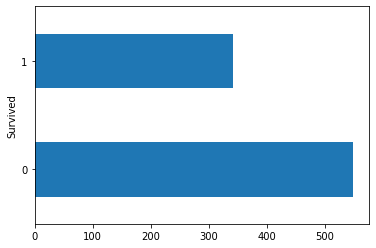

In [ ]:
df_titanic.groupby('Survived').size().plot.barh()

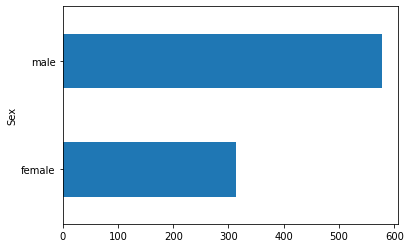

In [ ]:
df_titanic.groupby('Sex').size().plot.barh()

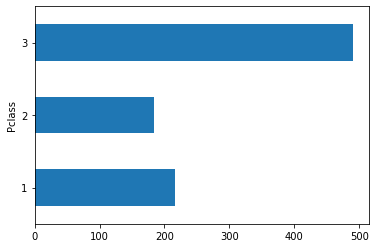

In [ ]:
df_titanic.groupby('Pclass').size().plot.barh()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


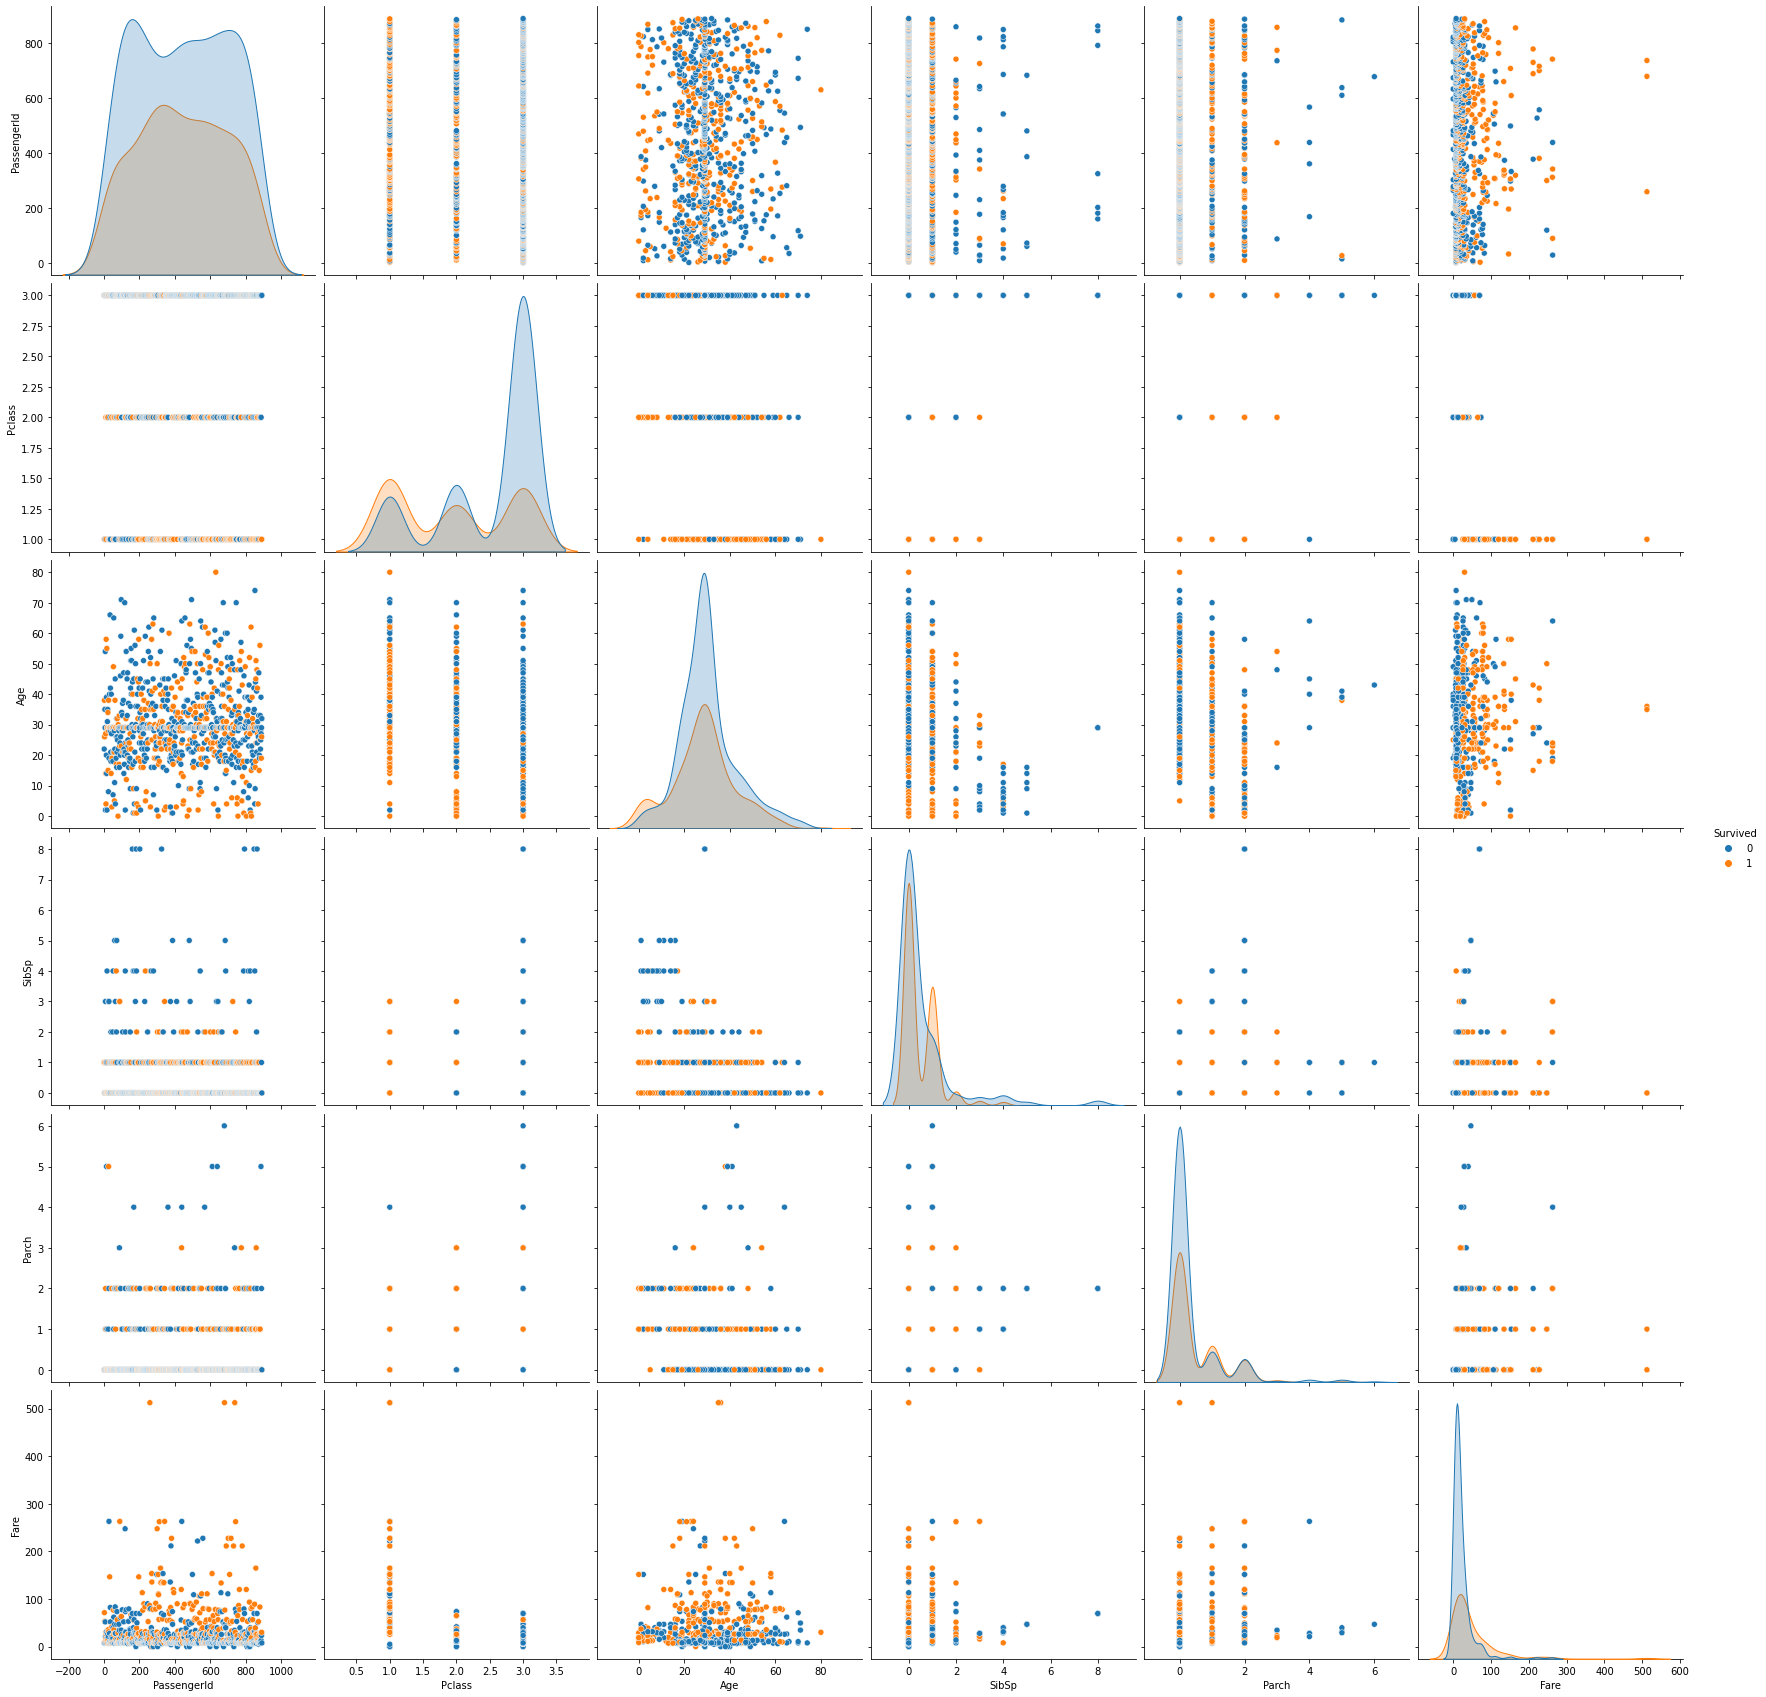

In [ ]:
sb.pairplot (df_titanic, hue='Survived', size=4,kind='scatter')

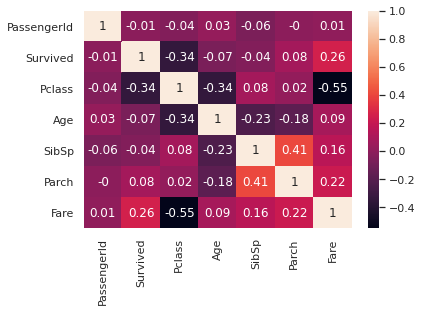

In [ ]:
corr_matrix=df_titanic.corr().round(2)
sb.heatmap(data=corr_matrix,annot=True)

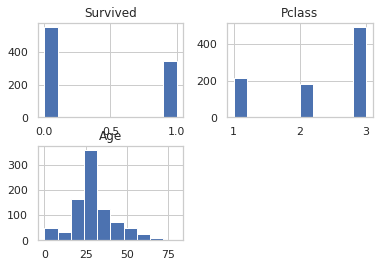

In [69]:
df_titanic.drop(['Parch','SibSp','PassengerId','Fare'], axis=1).hist() # retirando algunas variables para no graficar
plt.show()

## Separando los datos X, Y

In [122]:
#Seleccionando  características para predecir los datos
X = df_titanic[['Pclass']] 
y = df_titanic['Survived']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


## Separando en Train and test

In [135]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.1,random_state=4) # se probaron varios y este fue el que se obtuvo un mejor resultado

## Instanciar algoritmo y entrenar

In [136]:
naba_titanic=GaussianNB();
naba_titanic.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Realizar predicciones

In [151]:
Y_pred=naba_titanic.predict(X_test)
accuracy=accuracy_score(Y_test, Y_pred)
print ('Accuracy Titanic Naive Bayes: '+ str(accuracy*100))

Accuracy Titanic Naive Bayes: 75.55555555555556


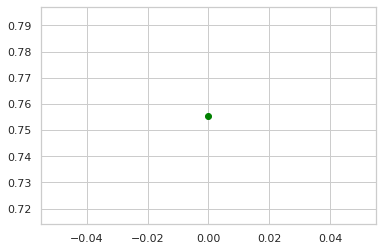

In [152]:
plt.plot(accuracy, color='green', marker='o', linestyle='solid')
plt.show()